# Assignment: Оптимизация в Python: глобальная оптимизация и оптимизация негладкой функции

### Введение

Сначала вы решите задачу поиска минимума функции с помощью одного из градиентных методов оптимизации, затем увидите отличия в работе градиентного метода и одного из методов глобальной оптимизации, а в заключение – найдете глобальный минимум негладкой функции, т.е. функции, у которой не всегда определен градиент.

Понимание задачи глобальной оптимизации и отличий градиентных методов, от методов, не использующих градиент, очень полезно в задачах анализа данных, в частности, для подбора параметров алгоритмов.
### Материалы

    Справка по функциям пакета scipy.optimize: http://docs.scipy.org/doc/scipy/reference/optimize.html
    Matplotlib User Guide: http://matplotlib.org/users/index.html

### Инструкция по выполнению

Данное задание состоит из трех частей. В каждой ответом будет набор чисел

## Задача 1. Минимизация гладкой функции

1. Рассмотрим все ту же функцию из задания по линейной алгебре: f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2), но теперь уже на промежутке [1, 30]
2. В первом задании будем искать минимум этой функции на заданном промежутке с помощью scipy.optimize. Разумеется, в дальнейшем вы будете использовать методы оптимизации для более сложных функций, а f(x) мы рассмотрим как удобный учебный пример.
3. Напишите на Питоне функцию, вычисляющую значение f(x) по известному x. Будьте внимательны: не забывайте про то, что по умолчанию в питоне целые числа делятся нацело, и о том, что функции sin и exp нужно импортировать из модуля math.
4. Попробуйте найти минимум, используя стандартные параметры в функции scipy.optimize.minimize (т.е. задав только функцию и начальное приближение). Попробуйте менять начальное приближение и изучить, меняется ли результат.
5. Укажите в scipy.optimize.minimize в качестве метода BFGS (один из самых точных в большинстве случаев градиентных методов оптимизации), запустите из начального приближения x=2. Градиент функции при этом указывать не нужно – он будет оценен численно. Полученное значение функции в точке минимума - ваш первый ответ по заданию 1.
6. Теперь измените начальное приближение на x=30. Значение функции в точке минимума - ваш второй ответ по заданию 1.
7. Стоит обдумать полученный результат. Почему ответ отличается в зависимости от начального приближения? Если нарисовать график функции, можно увидеть, в какие именно минимумы мы попали.

In [43]:
import math
from scipy import optimize as opt
import numpy as np
from matplotlib import pyplot as plt

def fun(x):
    return math.sin(x/5.)*math.exp(x/10.) + 5*math.exp(-x/2.)

def short_stat(res):
    return {
        "fun" : res.fun,
        "x" : res.x,
        "iterations" : res.nit,
        "evaluations" : res.nfev
    }

x0s = [0., 10., 20., 50., 100.]

[opt.minimize(fun, x0).fun for x0 in x0s]

C:\Users\Leoni\AppData\Local\Temp\ipykernel_19364\1305704618.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return math.sin(x/5.)*math.exp(x/10.) + 5*math.exp(-x/2.)


[1.7452682903319903,
 1.7452682903429801,
 -11.898894665971952,
 -275.34894180911255,
 -6371.765229165741]

In [44]:
short_stat(opt.minimize(fun, 2.,method='BFGS'))

C:\Users\Leoni\AppData\Local\Temp\ipykernel_19364\1305704618.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return math.sin(x/5.)*math.exp(x/10.) + 5*math.exp(-x/2.)


{'fun': 1.7452682903447336,
 'x': array([4.13627628]),
 'iterations': 6,
 'evaluations': 14}

In [45]:
short_stat(opt.minimize(fun, 30.,method='BFGS'))

C:\Users\Leoni\AppData\Local\Temp\ipykernel_19364\1305704618.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return math.sin(x/5.)*math.exp(x/10.) + 5*math.exp(-x/2.)


{'fun': -11.898894665981313,
 'x': array([25.88019321]),
 'iterations': 6,
 'evaluations': 14}

Функция имеет более 1го локального минимума, и в зависимости от начального приближения, мы попадает в 'ближайший' из них

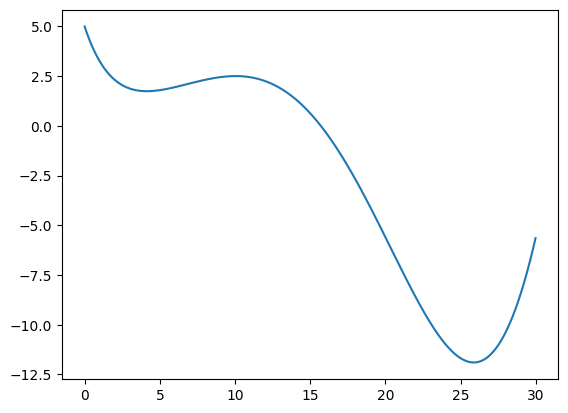

In [70]:
xs = np.arange(0, 30, 0.01)
ys = [fun(x) for x in xs]

plt.plot(xs, ys)

## Задача 2: Глобальная оптимизация

1. Теперь попробуем применить к той же функции f(x) метод глобальной оптимизации - дифференциальную эволюцию.
2. Изучите документацию и примеры использования функции scipy.optimize.differential_evolution.
3. Обратите внимание, что границы значений аргументов функции представляют собой список кортежей (list, в который помещены объекты типа tuple). Даже если у вас функция одного аргумента, возьмите границы его значений в квадратные скобки, чтобы передавать в этом параметре список из одного кортежа, т.к. в реализации scipy.optimize.differential_evolution длина этого списка используется чтобы определить количество аргументов функции.
4. Запустите поиск минимума функции f(x) с помощью дифференциальной эволюции на промежутке [1, 30]. Полученное значение функции в точке минимума - ответ в задаче 2. Запишите его с точностью до второго знака после запятой. В этой задаче ответ - только одно число.
5.Дифференциальная эволюция справилась с задачей поиска глобального минимума на отрезке, т.к. по своему устройству она предполагает борьбу с попаданием в локальные минимумы.
6. Сравните количество итераций, потребовавшихся BFGS для нахождения минимума при хорошем начальном приближении, с количеством итераций, потребовавшихся дифференциальной эволюции. При повторных запусках дифференциальной эволюции количество итераций будет меняться, но в этом примере, скорее всего, оно всегда будет сравнимым с количеством итераций BFGS. Однако в дифференциальной эволюции за одну итерацию требуется выполнить гораздо больше действий, чем в BFGS. Например, можно обратить внимание на количество вычислений значения функции (nfev) и увидеть, что у BFGS оно значительно меньше. Кроме того, время работы дифференциальной эволюции очень быстро растет с увеличением числа аргументов функции.

In [53]:
bounds = [(1, 30)]
res = opt.differential_evolution(fun, bounds)
print(f"Значения минимума до 2го знака: {res.fun:.2f}")
short_stat(res)

Значения минимума до 2го знака: -11.90


C:\Users\Leoni\AppData\Local\Temp\ipykernel_19364\1305704618.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return math.sin(x/5.)*math.exp(x/10.) + 5*math.exp(-x/2.)


{'fun': -11.898894665973899,
 'x': array([25.88019803]),
 'iterations': 4,
 'evaluations': 81}

## Задача 3. Минимизация негладкой функции

1. Теперь рассмотрим функцию h(x) = int(f(x)) на том же отрезке [1, 30], т.е. теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения.
2. Такая функция будет негладкой и даже разрывной, а ее график будет иметь ступенчатый вид. Постройте график h(x) с помощью matplotlib.
3. Попробуйте найти минимум функции h(x) с помощью BFGS, взяв в качестве начального приближения x=30. Получившееся значение функции – ваш первый ответ в этой задаче.
4. Теперь попробуйте найти минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции. Значение функции h(x) в точке минимума – это ваш второй ответ в этом задании.
5. Обратите внимание на то, что полученные ответы различаются. Это ожидаемый результат, ведь BFGS использует градиент (в одномерном случае – производную) и явно не пригоден для минимизации рассмотренной нами разрывной функции. Попробуйте понять, почему минимум, найденный BFGS, именно такой (возможно в этом вам поможет выбор разных начальных приближений).

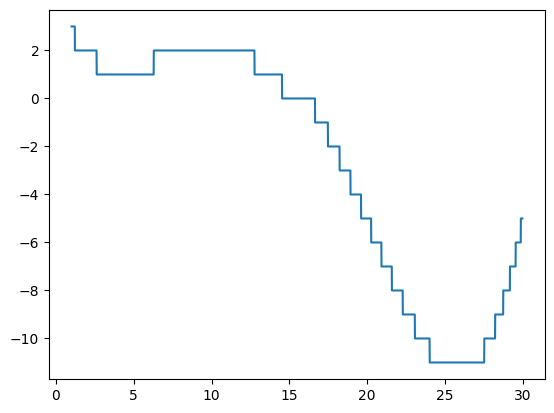

In [71]:
def h(x):
    return int(fun(x))

xs = np.arange(1, 30, 0.01)
ys = [h(x) for x in xs]

plt.plot(xs, ys)

In [72]:
short_stat(opt.minimize(h, 30, method="BFGS"))

C:\Users\Leoni\AppData\Local\Temp\ipykernel_19364\1305704618.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return math.sin(x/5.)*math.exp(x/10.) + 5*math.exp(-x/2.)


{'fun': -5, 'x': array([30.]), 'iterations': 0, 'evaluations': 2}

In [76]:
short_stat(opt.differential_evolution(h, [(1, 30)]))

C:\Users\Leoni\AppData\Local\Temp\ipykernel_19364\1305704618.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return math.sin(x/5.)*math.exp(x/10.) + 5*math.exp(-x/2.)


{'fun': np.float64(-11.0),
 'x': array([27.41979137]),
 'iterations': 6,
 'evaluations': 107}